# 선형 회귀 분석(Linear Regression Analysis)

### 개념
선형 회귀 분석은 독립 변수($X$)와 종속 변수($Y$) 사이의 선형 관계를 모델링하는 통계 기법입니다. 선형 회귀 분석의 기본 목적은 주어진 데이터셋에서 두 변수 사이의 관계를 설명하고, 이를 기반으로 새로운 데이터에 대한 예측을 수행하는 것입니다. 선형 회귀 모델은 다음과 같은 수식으로 표현됩니다:

$$ Y = \beta_0 + \beta_1 X + \epsilon $$

여기서:
- $Y$는 종속 변수 (예측하려는 값)
- $X$는 독립 변수 (설명 변수)
- $\beta_0$는 절편 (intercept)
- $\beta_1$는 기울기 (slope, 회귀계수)
- $\epsilon$는 오차항 (error term)

### 회귀계수의 검정 (Hypothesis Testing for Regression Coefficients)

회귀 모델에서 회귀계수 $\beta_1$가 통계적으로 유의미한지를 검정하기 위해 가설 검정을 수행합니다. 이를 위해 귀무가설과 대립가설을 설정합니다.

1. **귀무가설 (Null Hypothesis, $ H_0 $)**:
   - $\beta_1 = 0$: 독립 변수 $ X $가 종속 변수 $ Y $에 영향을 미치지 않는다.

2. **대립가설 (Alternative Hypothesis, $ H_A $)**:
   - $\beta_1 \neq 0$: 독립 변수 $ X $가 종속 변수 $ Y $에 영향을 미친다.

### 1. 모듈 불러오기

In [54]:
# import 불러올 패키지명 as 그 패키지를 파이썬에서 사용할 이름
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 노트북상에서 이쁘게 출력하기 위해
from IPython.display import display, HTML

### 2. 데이터 불러오기

### 데이터 소개

Boston Housing Data는 1970년 보스턴 대도시 통계 지역(SMSA)에서 수집된 보스턴 교외나 도시의 각 레코드를 설명하는 데이터셋입니다. 

이 데이터는 주로 주택 가격 예측을 위한 연구에 사용됩니다. 

아래는 각 속성의 설명입니다:

1. **CRIM**: 인구 1인당 범죄율 - 해당 지역의 범죄율을 나타냅니다.
2. **ZN**: 25,000 평방피트 이상의 주거용 토지 비율 - 큰 주거용 토지의 비율을 나타냅니다.
3. **INDUS**: 비소매 상업 지역 비율 - 해당 지역의 비소매 상업 지구의 비율을 나타냅니다.
4. **CHAS**: Charles River 더미 변수 - 해당 지역이 Charles 강과 접하는지 여부를 나타냅니다. (1이면 접함, 0이면 접하지 않음)
5. **NOX**: 질소 산화물 농도 - 10백만 분의 1로 측정된 질소 산화물 농도를 나타냅니다.
6. **RM**: 주택당 평균 방 수 - 해당 지역 주택의 평균 방 개수를 나타냅니다.
7. **AGE**: 1940년 이전에 건설된 자가 주택 비율 - 오래된 자가 주택의 비율을 나타냅니다.
8. **DIS**: 5개 보스턴 고용 센터까지의 가중 거리 - 해당 지역에서 보스턴의 주요 고용 센터까지의 평균 거리를 나타냅니다.
9. **RAD**: 방사형 고속도로 접근성 지수 - 고속도로 접근성을 나타내는 지수입니다.
10. **TAX**: 재산세율 - 만 달러당 재산세율을 나타냅니다.
11. **PTRATIO**: 학생-교사 비율 - 해당 지역의 학생과 교사의 비율을 나타냅니다.
12. **B**: 흑인 비율 지수 - 흑인 비율을 바탕으로 계산된 지수로, 1000(Bk - 0.63)^2로 나타냅니다.
13. **LSTAT**: 저소득층 비율 - 저소득층 인구 비율을 나타냅니다.
14. **MEDV**: 자가 주택의 중앙값 (천 달러 단위) - 해당 지역의 자가 주택 가격 중앙값을 나타냅니다.
---

- X변수 : 1 ~ 13

- Y변수 : 14

In [24]:
# Load data
data = pd.read_csv('./Data/BostonHousing.csv')

print(data.shape)
print(data.columns)
display(HTML(data.describe().to_html()))
data.head()

(506, 12)
Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE ', 'DIS', 'TAX', 'PTRATIO',
       'B', 'LSTAT', 'MEDV'],
      dtype='object')


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2


### 3. 데이터 준비 
#### Train set / Test set 나누기

In [25]:
X_cols = data.columns.drop('MEDV')
X = data[X_cols]
y = data['MEDV']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. 선형회귀 모델 구축하기

#### Sklearn의 LinearRegression을 사용한 선형 회귀 분석
`LinearRegression`: 가장 기본적인 결정론적 선형 회귀 방법으로, 잔차 제곱합(RSS: Residual Sum of Squares)을 최소화하는 가중치(β1, β2, ...)를 구하는 방법입니다.
- 모델 선언: model = LinearRegression()
- 모델 학습: model.fit(X_train, y_train)
- 모델 예측: model.predict(X_test)
- 잔차계산: 
  - 학습 : y_train - model.predict(X_train)
  - 검증 : y_test - model.predict(X_test)

In [27]:
# 모델 생성
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
lr.coef_, lr.intercept_ 

(array([-8.51438503e-02,  2.33921906e-02,  2.40640554e-03, -1.42413431e+01,
         4.82359136e+00, -8.58179490e-03, -1.44404703e+00,  6.66665916e-04,
        -8.38391763e-01,  1.22061824e-02, -5.13855411e-01]),
 23.49516819313608)

In [29]:
# 예측
y_pred = lr.predict(X_test)

# 잔차 계산
residuals = y_train - lr.predict(X_train)

#### 4.1 선형회귀 모델 가정 확인하기
- `선형성` : 설명변수와 반응변수 간의 관계 분포가 선형의 관계를 가진다.
- `독립성` : 설명변수와 다른 설명변수간에 상관관계가 적다.
- `잔차의 등분산성` : 잔차가 특정한 패턴을 보이지 않는다. (점점 커지거나 작아지거나 하는 패턴이 없다.)
- `잔차의 정규성` : 잔차가 정규분포이다.

#### 4.1.1 확률오차의 정규성 확인

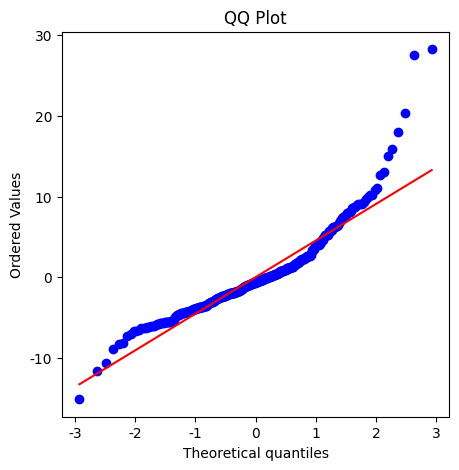

In [30]:
import scipy.stats as stats  # scipy.stats 임포트 추가

plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(5)

# QQ Plot
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title('QQ Plot')
plt.show()

- QQ Plot에서 잔차가 정규 분포를 따르지 않는 것으로 보입니다. 특히, 극단값(outliers)이 존재할 가능성이 있습니다.
- 하지만, 대다수의 점들이 직선에 가깝게 위치하고 있으므로, 정규성 가정을 만족한다고 볼 수 있습니다.

#### 4.1.2 확률오차의 등분산성 확인

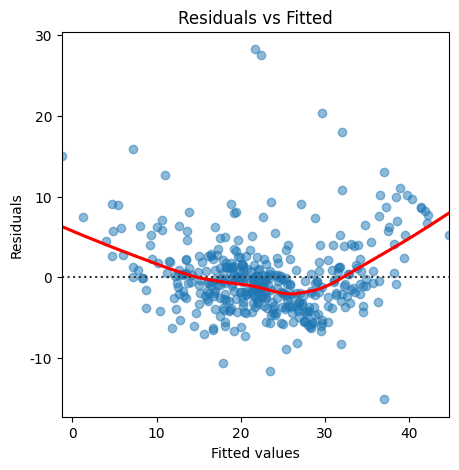

In [31]:
import statsmodels.api as sm

fitted_values = lr.predict(X_train)

fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(5)

sns.residplot(x=fitted_values, y=residuals, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color':'red'}, ax=ax)
ax.set_title('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')
plt.show()

- Residuals vs Fitted Plot에서 잔차가 U자형 패턴을 보이고 있어, 등분산성을 따르지 않는 것으로 보입니다.
- 하지만, 분석가의 관점에 따라 이정도의 잔차는 특정한 패턴을 보이지 않는다고 볼 수도 있습니다.

### 4.2. 선형회귀 모델 평가하기
- R-squared (결정계수,coefficient of determination):모형의 성능
- coef (회귀계수): X가 한단위 증가할 때 Y의 변화량
- P>[t] (p-value):0.05(유의수준) 이하일 때 변수가 유의미

In [32]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Squared Error: 27.076445309751165
R^2 Score: 0.6307780105854296
Mean Absolute Error: 3.409932206067992


## 5. 과연 지금이 최선인가? 변수 선택하기

변수 선택은 모델의 성능을 향상시키고 해석 가능성을 높이는 중요한 과정입니다. 변수를 선택하는 다양한 방법이 있으며, 여기서는 몇 가지 대표적인 방법을 소개합니다:

### 1. 통계적 유의성 기반 변수 선택

- `statsmodels`의 회귀 결과 요약 통계에서 각 변수의 p-value를 확인하여, 유의하지 않은 변수를 제거할 수 있습니다. 일반적으로 p-value가 0.05보다 큰 변수는 유의하지 않다고 판단할 수 있습니다.

### 2. 상관 계수 기반 변수 선택

- 각 변수와 목표 변수 간의 상관 계수를 계산하여, 상관 계수가 낮은 변수를 제거할 수 있습니다. 상관 계수가 낮으면 해당 변수가 목표 변수와의 관계가 약하다는 것을 의미합니다.

### 3. 반복적 특성 선택 (Recursive Feature Elimination, RFE)

-  `sklearn`의 `RFE`를 사용하여, 반복적으로 가장 중요하지 않은 변수를 제거하며 최적의 변수 집합을 선택할 수 있습니다.

본 강의에서는 `3번 방법`을 사용하여 변수를 선택하겠습니다. 본래 변수 선택 기법은 아래 기법들이 존재하며 이는 다른 시간에 별도로 다뤄보겠습니다.

- `전진 선택 (Forward Selection)`: 변수를 하나씩 추가하면서 모델 성능이 향상되는 변수를 선택합니다.
- `후진 제거 (Backward Elimination)`: 모든 변수를 포함한 상태에서 시작하여, 하나씩 제거하면서 모델 성능이 크게 떨어지지 않는 변수를 제거합니다.
- `단계적 선택 (Stepwise Selection)`: 전진 선택과 후진 제거를 결합한 방법으로, 변수 추가와 제거를 반복하면서 최적의 변수 집합을 찾습니다.

In [42]:
# 데이터 형태
X_train.shape

(404, 11)

In [43]:
# previous 결과
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Squared Error: 27.076445309751165
R^2 Score: 0.6307780105854296
Mean Absolute Error: 3.409932206067992


In [51]:
from sklearn.feature_selection import RFE
# RFE 적용하여 학습
rfe = RFE(lr, n_features_to_select=7)  # 선택할 특성의 개수
rfe.fit(X_train, y_train)

# 선택된 특성
selected_features = X_train.columns[rfe.support_]
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]
print(f'Selected Features: {selected_features}')

# lr 모델 생성 및 예측
lr.fit(X_train_reduced, y_train)
y_pred = lr.predict(X_test_reduced)

# 변수 선택 후 결과
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Selected Features: Index(['CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')
Mean Squared Error: 25.221615308054147
R^2 Score: 0.6560709918249488
Mean Absolute Error: 3.313967607148686


## 6. 예측: 미래의 반응변수 값 예측하기

In [52]:
# 선택된 특성으로 모델 재학습
lr.fit(X_train_reduced, y_train)

# 예측
y_train_pred = lr.predict(X_train_reduced)
y_test_pred = lr.predict(X_test_reduced)

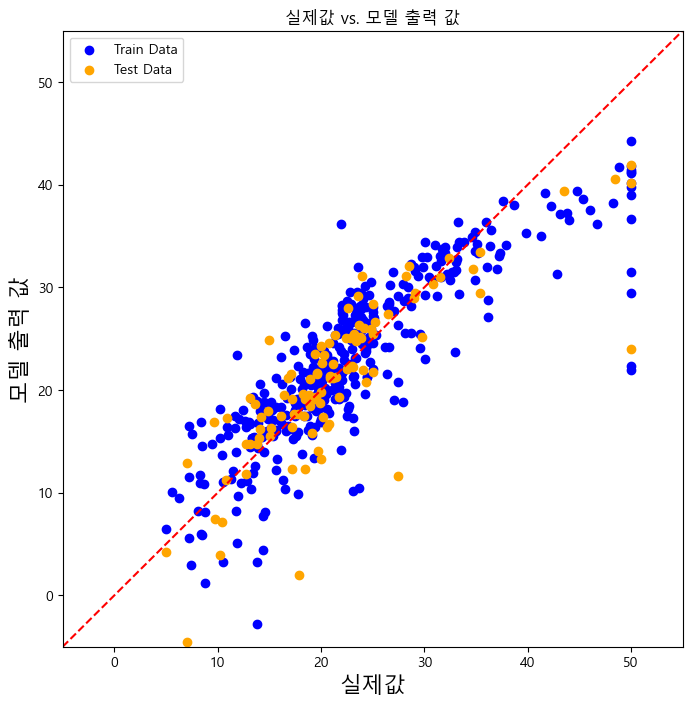

In [55]:
# 실제값 vs 예측값 플롯
plt.figure(figsize=(8, 8))
plt.title('실제값 vs. 모델 출력 값')
plt.scatter(y_train, y_train_pred, color='blue', label='Train Data')
plt.scatter(y_test, y_test_pred, color='orange', label='Test Data')
plt.plot([-5, 55], [-5, 55], ls="--", c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값', size=16)
plt.xlim(-5, 55)
plt.ylim(-5, 55)
plt.legend()
plt.show()

# EOD